20180634_최준혁_과제1번

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa import stattools
import FinanceDataReader as fdr
import datetime

Using Python, perform the following for the KOSPI index returns during the
period 2021:01:02-2021:12:30 (on the basis of daily, closing prices; data available
at https://ecos.bok.or.kr/áex/EasySearch.jsp).

In [2]:
s = datetime.datetime(2021,1,2)
e = datetime.datetime(2021,12,30)
data = fdr.DataReader("^KS11",s,e)
df = data['Close'].dropna()

In [3]:
df #2021년 장이 1월 4일(월)에 열림

Date
2021-01-04    2944.449951
2021-01-05    2990.570068
2021-01-06    2968.209961
2021-01-07    3031.679932
2021-01-08    3152.179932
                 ...     
2021-12-23    2998.169922
2021-12-24    3012.429932
2021-12-27    2999.550049
2021-12-28    3020.239990
2021-12-29    2993.290039
Name: Close, Length: 247, dtype: float64

Plot the sample autocorrelation function of the simple returns of the KOSPI index (log-differences of the index). <br>
Do they indicate serial correlation?

In [4]:
log_return = []
for j in range(len(df)):
    if j == 0 : continue
    else : log_return.append(np.log(df[j])-np.log(df[j-1])) #log difference
log_return

[0.01554200161845909,
 -0.00750496304372561,
 0.021157834503501505,
 0.038977356508338445,
 -0.0011840027124296881,
 -0.007172031364802933,
 0.007121239367583243,
 0.0005207480985447432,
 -0.020536891529033596,
 -0.02359846482912431,
 0.025786681145195445,
 0.007053161689393406,
 0.014753147642663222,
 -0.0064144634154494895,
 0.02153286328676529,
 -0.021634702821367924,
 -0.005668342849629582,
 -0.017285113677518282,
 -0.030717417529013247,
 0.02662962918090095,
 0.013092273393304765,
 0.010558172708668323,
 -0.013552829151235457,
 0.010656954997022794,
 -0.009462565346177954,
 -0.0021276445324183157,
 0.005144558777891106,
 0.014860402160811859,
 0.005150362004965103,
 -0.009375998129440788,
 -0.015134410307142687,
 0.0067676259068853994,
 -0.009008772697590928,
 -0.003141519065978926,
 -0.024769358723018442,
 0.034364540385656284,
 -0.02838243846532329,
 0.010210121569578234,
 0.012770131500387194,
 -0.012895022091321096,
 -0.005677342981185163,
 -0.01001272067396819,
 -0.0066943382

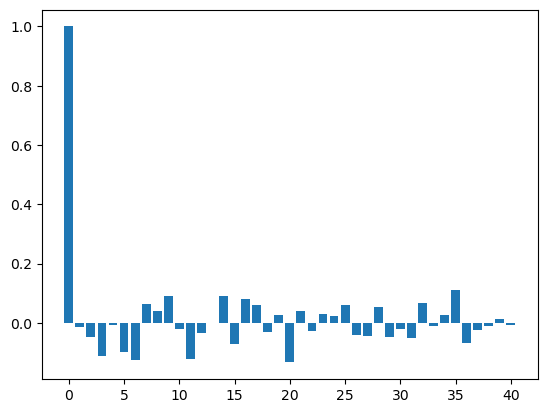

In [5]:
n_lags=40
atcf_qs=stattools.acf(log_return, nlags=n_lags,qstat=True)
  # atcf_qs[0]: values of ACF
  # atcf_qs[1]: values of q-stat
  # atcf_qs[2]: p-values of the q-stat
plt.bar(range(n_lags+1),atcf_qs[0])
plt.show()

ans : 그래프만 보았을 경우 serial correlation은 보이지 않는다

Test the null of no serial correlation using the Ljung-Box test at the 5%
level. Set the lag length at 10.

In [6]:
n_lags=10
atcf_qs=stattools.acf(log_return, nlags=n_lags,qstat=True)
  # atcf_qs[0]: values of ACF
  # atcf_qs[1]: values of q-stat
  # atcf_qs[2]: p-values of the q-stat
atcf_qs[2]

array([0.84206584, 0.75288016, 0.29544476, 0.44593275, 0.29356783,
       0.12056061, 0.13403173, 0.17225091, 0.13625489, 0.18532994])

ans : p-value가 전부 0.05보다 높으므로 5% 유의수준에서 Ljung-Box test에서 귀무가설을 기각하지 못한다(no serial corr)